Name:

*   List item


Z-ID:

*   List item


Assignment: 

*   8


Description: 
*   Data processing and visualization in Python





In [ ]:
from google.colab import files
uploaded = files.upload()

Saving poke.json to poke (1).json


In [ ]:

import json
file_name = "poke.json"
import pandas as pd
df = pd.read_json (file_name)
df

,name,generation,species,primary_type,hp,height_m,weight_kg,speed,attack,defense,sp_attack,sp_defense
0,Bulbasaur,1,Seed Pokémon,Grass,45,0.7,6.9,45,49,49,65,65
1,Ivysaur,1,Seed Pokémon,Grass,60,1.0,13.0,60,62,63,80,80
2,Venusaur,1,Seed Pokémon,Grass,80,2.0,100.0,80,82,83,100,100
3,Mega Venusaur,1,Seed Pokémon,Grass,80,2.4,155.5,80,100,123,122,120
4,Charmander,1,Lizard Pokémon,Fire,39,0.6,8.5,65,52,43,60,50
...,...,...,...,...,...,...,...,...,...,...,...,...
1023,Zacian Hero of Many Battles,8,Warrior Pokémon,Fairy,92,2.8,110.0,138,130,115,80,115
1024,Zamazenta Crowned Shield,8,Warrior Pokémon,Fighting,92,2.9,785.0,128,130,145,80,145
1025,Zamazenta Hero of Many Battles,8,Warrior Pokémon,Fighting,92,2.9,210.0,138,130,115,80,115
1026,Eternatus,8,Gigantic Pokémon,Poison,140,20.0,950.0,130,85,95,145,95


Compute Combat Power (15 pts)

In [ ]:
Attack = 2 * round(pow(df.attack, 0.5) * pow(df.sp_attack,0.5) + pow(df.speed,0.5))
Defense = 2 * round(pow(df.defense,0.5) * pow(df.sp_defense,0.5) + pow(df.speed,0.5))
Stamina = 2 * df.hp
MaxCP = (Attack + 15) * pow((Defense + 15),0.5) * pow((Stamina + 15),0.5) * pow(0.7903001,2) / 10
MaxCP

0       1071.537544
1       1632.187772
2       2580.488521
3       3466.490116
4        955.243610
           ...     
1023    3511.502853
1024    3839.737461
1025    3511.502853
1026    4186.082415
1027    9186.088759
Length: 1028, dtype: float64

In [ ]:
df['MaxCP'] = MaxCP
df

,name,generation,species,primary_type,hp,height_m,weight_kg,speed,attack,defense,sp_attack,sp_defense,MaxCP
0,Bulbasaur,1,Seed Pokémon,Grass,45,0.7,6.9,45,49,49,65,65,1071.537544
1,Ivysaur,1,Seed Pokémon,Grass,60,1.0,13.0,60,62,63,80,80,1632.187772
2,Venusaur,1,Seed Pokémon,Grass,80,2.0,100.0,80,82,83,100,100,2580.488521
3,Mega Venusaur,1,Seed Pokémon,Grass,80,2.4,155.5,80,100,123,122,120,3466.490116
4,Charmander,1,Lizard Pokémon,Fire,39,0.6,8.5,65,52,43,60,50,955.243610
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,Zacian Hero of Many Battles,8,Warrior Pokémon,Fairy,92,2.8,110.0,138,130,115,80,115,3511.502853
1024,Zamazenta Crowned Shield,8,Warrior Pokémon,Fighting,92,2.9,785.0,128,130,145,80,145,3839.737461
1025,Zamazenta Hero of Many Battles,8,Warrior Pokémon,Fighting,92,2.9,210.0,138,130,115,80,115,3511.502853
1026,Eternatus,8,Gigantic Pokémon,Poison,140,20.0,950.0,130,85,95,145,95,4186.082415


In [ ]:
df = df.sort_values(by ='MaxCP', ascending=False)
df

,name,generation,species,primary_type,hp,height_m,weight_kg,speed,attack,defense,sp_attack,sp_defense,MaxCP
1027,Eternatus Eternamax,8,Gigantic Pokémon,Poison,255,100.0,NaN,130,115,250,125,250,9186.088759
458,Mega Rayquaza,3,Sky High Pokémon,Dragon,105,10.8,392.0,115,180,100,180,100,5725.850606
456,Primal Groudon,3,Continent Pokémon,Ground,100,5.0,999.7,90,180,160,150,90,5492.767954
454,Primal Kyogre,3,Sea Basin Pokémon,Water,100,9.8,430.0,90,150,90,180,160,5492.767954
189,Mega Mewtwo X,1,Genetic Pokémon,Psychic,106,2.3,127.0,130,190,100,154,100,5490.480903
...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,Blipbug,8,Larva Pokémon,Bug,25,0.4,8.0,45,20,20,25,45,346.783652
345,Shedinja,3,Shed Pokémon,Bug,1,0.8,1.2,40,90,45,30,30,339.031864
520,Happiny,4,Playhouse Pokémon,Normal,100,0.6,24.4,30,5,5,15,65,312.566215
164,Magikarp,1,Fish Pokémon,Water,20,0.9,10.0,80,10,55,15,20,262.698668


In [ ]:
df2 = df.drop_duplicates(subset ='generation', keep = "first")
df2

,name,generation,species,primary_type,hp,height_m,weight_kg,speed,attack,defense,sp_attack,sp_defense,MaxCP
1027,Eternatus Eternamax,8,Gigantic Pokémon,Poison,255,100.0,NaN,130,115,250,125,250,9186.088759
458,Mega Rayquaza,3,Sky High Pokémon,Dragon,105,10.8,392.0,115,180,100,180,100,5725.850606
189,Mega Mewtwo X,1,Genetic Pokémon,Psychic,106,2.3,127.0,130,190,100,154,100,5490.480903
930,Ultra Necrozma,7,Prism Pokémon,Psychic,97,7.5,230.0,129,167,97,167,97,5091.398806
750,White Kyurem,5,Boundary Pokémon,Dragon,125,3.6,325.0,95,120,90,170,100,4895.570422
526,Mega Garchomp,4,Mach Pokémon,Dragon,108,1.9,95.0,92,170,115,120,95,4720.455236
835,Zygarde Complete Forme,6,Order Pokémon,Dragon,216,4.5,610.0,85,100,121,91,95,4669.483338
295,Mega Tyranitar,2,Armor Pokémon,Rock,100,2.5,255.0,71,164,150,95,120,4464.706056


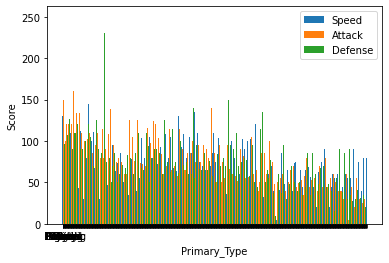

In [ ]:
N = len(df)

ind = np.arange(N) 
width = 0.4      
plt.bar(ind , df.speed, width, label='Speed')
plt.bar(ind + width, df.attack, width,
    label='Attack')
plt.bar(ind + width + width, df.defense, width,
    label='Defense')

plt.ylabel('Score')
plt.xlabel('Primary_Type')

plt.xticks(ind + width / 2, df['primary_type'].unique())
plt.legend(loc='best')
plt.show()

In [ ]:
new_df = df.groupby("primary_type")
new_df

In [ ]:
new_df = new_df.mean()
new_df = new_df.reset_index()
new_df

,primary_type,generation,hp,height_m,weight_kg,speed,attack,defense,sp_attack,sp_defense,MaxCP
0,Bug,3.814815,57.024691,0.896296,33.954321,63.259259,71.074074,71.802469,56.382716,65.074074,1445.582099
1,Dark,4.318182,68.818182,1.152273,57.581818,75.750000,81.000000,64.977273,70.454545,66.477273,1830.593901
2,Dragon,4.525000,82.375000,2.247500,125.287500,84.450000,107.200000,84.775000,91.525000,84.950000,2865.559292
3,Electric,4.278689,61.950820,0.965574,36.070492,84.901639,74.573770,66.508197,89.377049,72.016393,1925.708611
4,Fairy,4.954545,72.954545,0.927273,40.445455,59.545455,68.090909,70.545455,78.954545,89.181818,1974.060052
5,Fighting,4.421053,71.394737,1.300000,79.292105,69.210526,101.263158,72.210526,56.421053,68.552632,1886.885407
6,Fire,3.892308,69.430769,1.204615,65.020000,74.369231,85.400000,68.107692,86.415385,71.292308,2090.397105
7,Flying,6.750000,69.625000,1.112500,41.225000,87.000000,75.125000,64.375000,73.875000,70.000000,1915.485001
8,Ghost,4.756098,63.951220,1.212195,64.360976,61.414634,74.195122,80.439024,81.975610,78.780488,1881.031122
9,Grass,4.219780,66.736264,1.071429,39.839560,59.769231,74.813187,71.824176,75.043956,70.054945,1833.070437


In [ ]:
new_df['attack_and_dfense'] = new_df.attack+new_df.defense
new_df

,primary_type,generation,hp,height_m,weight_kg,speed,attack,defense,sp_attack,sp_defense,MaxCP,attack_and_dfense
0,Bug,3.814815,57.024691,0.896296,33.954321,63.259259,71.074074,71.802469,56.382716,65.074074,1445.582099,142.876543
1,Dark,4.318182,68.818182,1.152273,57.581818,75.750000,81.000000,64.977273,70.454545,66.477273,1830.593901,145.977273
2,Dragon,4.525000,82.375000,2.247500,125.287500,84.450000,107.200000,84.775000,91.525000,84.950000,2865.559292,191.975000
3,Electric,4.278689,61.950820,0.965574,36.070492,84.901639,74.573770,66.508197,89.377049,72.016393,1925.708611,141.081967
4,Fairy,4.954545,72.954545,0.927273,40.445455,59.545455,68.090909,70.545455,78.954545,89.181818,1974.060052,138.636364
5,Fighting,4.421053,71.394737,1.300000,79.292105,69.210526,101.263158,72.210526,56.421053,68.552632,1886.885407,173.473684
6,Fire,3.892308,69.430769,1.204615,65.020000,74.369231,85.400000,68.107692,86.415385,71.292308,2090.397105,153.507692
7,Flying,6.750000,69.625000,1.112500,41.225000,87.000000,75.125000,64.375000,73.875000,70.000000,1915.485001,139.500000
8,Ghost,4.756098,63.951220,1.212195,64.360976,61.414634,74.195122,80.439024,81.975610,78.780488,1881.031122,154.634146
9,Grass,4.219780,66.736264,1.071429,39.839560,59.769231,74.813187,71.824176,75.043956,70.054945,1833.070437,146.637363


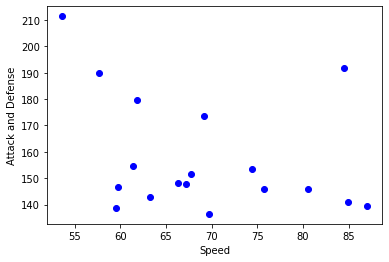

In [ ]:
  
plt.scatter(new_df.speed, new_df.attack_and_dfense, c ="blue")
plt.xlabel('Speed')
plt.ylabel('Attack and Defense')  
# To show the plot
plt.show()

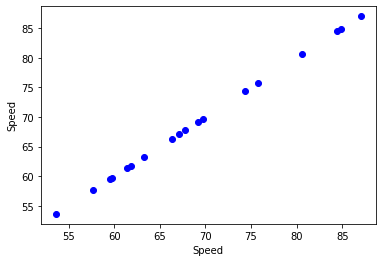

In [ ]:
plt.scatter(new_df.speed, new_df.speed, c ="blue")
plt.xlabel('Speed')
plt.ylabel('Speed')  
# To show the plot
plt.show()

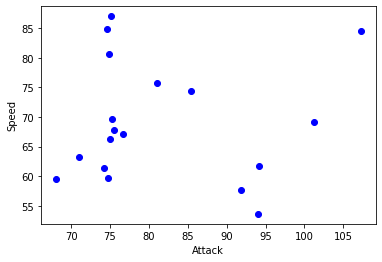

In [ ]:
plt.scatter(new_df.attack, new_df.speed, c ="blue")
plt.xlabel('Attack')
plt.ylabel('Speed')  
# To show the plot
plt.show()

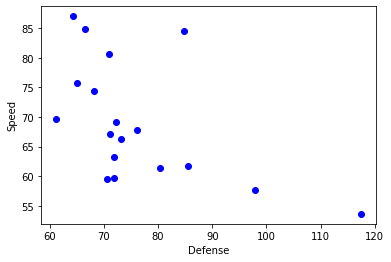

In [ ]:
plt.scatter(new_df.defense, new_df.speed, c ="blue")
plt.xlabel('Defense')
plt.ylabel('Speed')  
# To show the plot
plt.show()

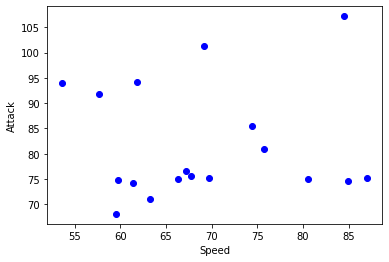

In [ ]:
plt.scatter(new_df.speed, new_df.attack, c ="blue")
plt.xlabel('Speed')
plt.ylabel('Attack')  
# To show the plot
plt.show()

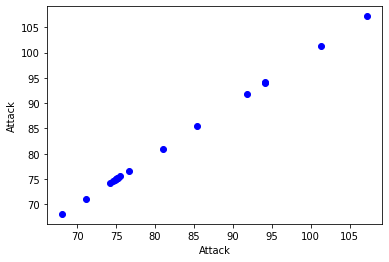

In [ ]:
plt.scatter(new_df.attack, new_df.attack, c ="blue")
plt.xlabel('Attack')
plt.ylabel('Attack')  
# To show the plot
plt.show()

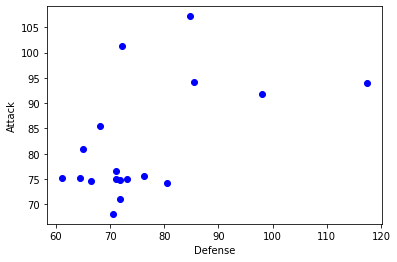

In [ ]:
plt.scatter(new_df.defense, new_df.attack, c ="blue")
plt.xlabel('Defense')
plt.ylabel('Attack')  
# To show the plot
plt.show()

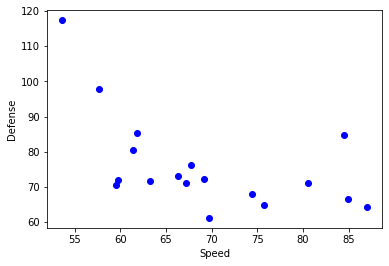

In [ ]:
plt.scatter(new_df.speed, new_df.defense, c ="blue")
plt.xlabel('Speed')
plt.ylabel('Defense')  
# To show the plot
plt.show()

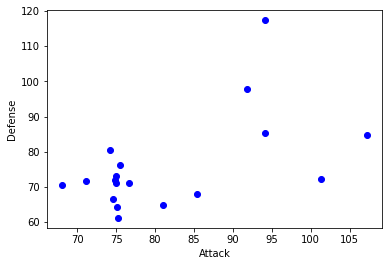

In [ ]:
plt.scatter(new_df.attack, new_df.defense, c ="blue")
plt.xlabel('Attack')
plt.ylabel('Defense')  
# To show the plot
plt.show()

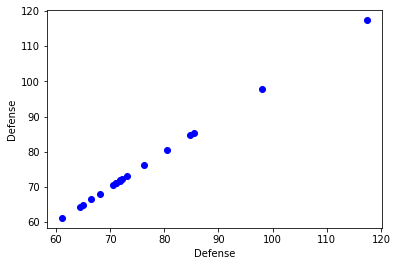

In [ ]:
plt.scatter(new_df.defense, new_df.defense, c ="blue")
plt.xlabel('Defense')
plt.ylabel('Defense')  
# To show the plot
plt.show()

In [ ]:
import plotly.figure_factory as ff
import plotly.graph_objs as go
from IPython.display import HTML
from plotly.offline import init_notebook_mode, iplot

def attack_vs_def():
    data = []
    for i in range(0,17):
      type = df.primary_type[i]
      type_data = df[df['primary_type'] == type]

      for i in range(1, 7):
          gen = type_data[type_data['generation'] == i]
          trace = go.Scatter(
              x=gen['attack'],
              y=gen['defense'],
              mode='markers',
              marker=dict(
                  symbol='circle',
                  sizemode='area',
                  size=gen['speed'],
                  sizeref=2. * max(gen['speed']) / (2000),
                  line=dict(
                      width=2
                  ),
              ),
              name='generation {}'.format(i),
              text=type_data['name']
          )
          data.append(trace)

    layout = go.Layout(
        showlegend=True,
        xaxis=dict(
            title="Attack"
        ),
        yaxis=dict(
            title="Defense"
        ),
        title="Attack vs. Defense of {} pokemon over generations, sized by Speed".format(type)
    )

    fig = go.Figure(data=data, layout=layout)
    return fig
iplot(attack_vs_def(), filename='Fire Over Generation')


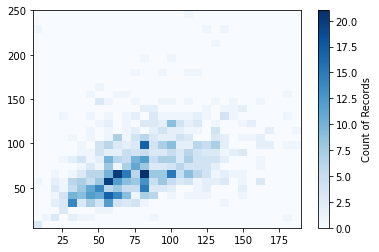

In [ ]:
plt.hist2d(df.attack, df.defense, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('Count of Records')